# 1.8 Randomized Singular Value Decomposition (SVD)
* 이번 section에서는 데이터 X행렬의 열공간을 무작위로 샘플링하며, SVD에서 U행렬의 주요 열에 걸쳐있을 부분 공간을 찾을 것이다.

    * 더 빠르게 계산할 수 있는 수학적인 방법을 살펴본다.
 
    * Step1. random projection  $P \in R^ {m\times r}$ 
        * $ Z = X*P $  &rarr;  열공간의 축소
        * $ Z = Q*R $  &rarr; $Q : orthogonal basis for Z,(and X) $
        
        <img src="fig/fig3.png" width="40%" height="30%" title="svd" alt="RubberDuck"></img>

        * $P$는 캡쳐하려는 순위 만큼만 열을 갖는 tall_skinny matrix
        * $X$의 모든 열공간을 샘플링한다. $Z$에는 $X$의 지배적인 열공간이 캡쳐된다.


    * Step2. project $X into Q$, $Y = Q^T * X$
    * SVD $Y$ = $U_Y \Sigma V^T $ &rarr; $ \Sigma V^T $ 는 $X$와 동일하다. (정의)
    * $U_X = Q*U_Y$
    * $X$의 SVD를 직접계산하는 것보다 훨씬 적은 비용으로 계산할 수 있다.


&rarr; 요약 : 데이터가 큰 X의 SVD를 계산하는 것은 큰 비용이 들어가는 계산이다. 이때 r의 낮은 순위를 이용하여 축소하여 계산하면 적은 비용으로 SVD를 계산할 수 있다.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [2]:
A = imread(os.path.join('..','DATA','jupiter.jpg'))
X = np.mean(A,axis=2) # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(X,full_matrices=0) # Deterministic SVD

r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X,r,q,p)

In [3]:
## Reconstruction
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XSVD,ord=2) / np.linalg.norm(X,ord=2)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XrSVD,ord=2) / np.linalg.norm(X,ord=2)

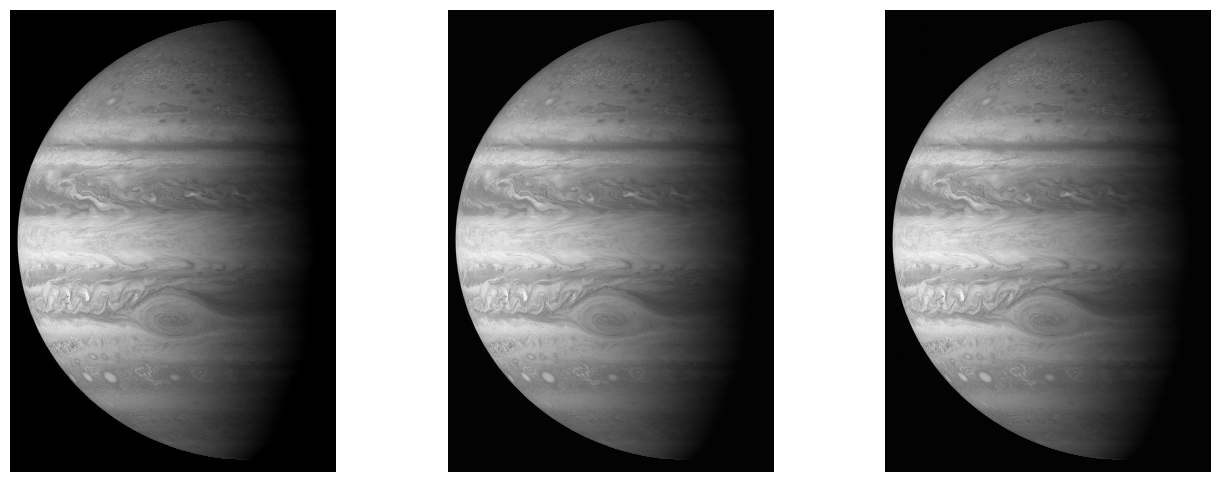

In [4]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

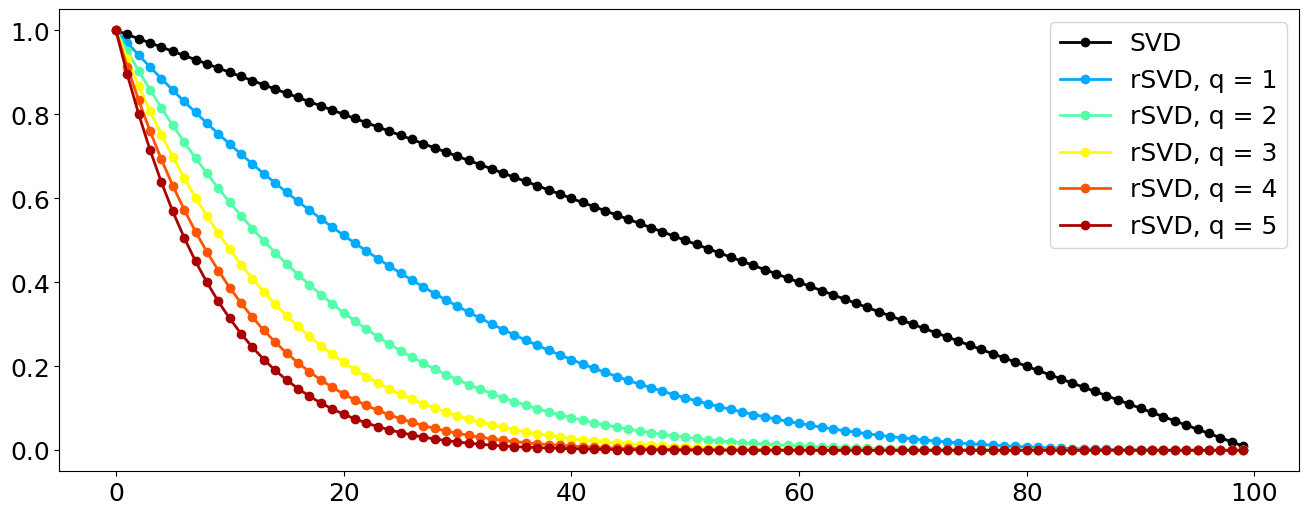

In [5]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',linewidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()